# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [7]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [11]:
# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [13]:
# Extract all rows of data
table = soup.find("table")

df = pd.read_html(str(table))
df

C:\Users\camei\AppData\Local\Temp\ipykernel_13776\1279608270.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))


[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [16]:
table_rows = table.find_all("table", class_= "table")
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [18]:
# Create an empty list
marvins_weather = []

# Loop through the scraped data to create a list of rows
weather_table = table.find_all('th')

for header_element in weather_table:
    title = header_element.text
    marvins_weather.append(title)
marvins_weather

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [20]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df1 = pd.DataFrame(columns=marvins_weather)
for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        lenghth=len(df1)
        df1.loc[lenghth]=row_data

In [22]:
# Confirm DataFrame was created successfully
df1.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [27]:
# Change data types for data analysis
df1['id']=df1['id'].astype(int)
df1['terrestrial_date']=pd.to_datetime(df1['terrestrial_date'])
df1['sol']=df1['sol'].astype(int)
df1['ls']=df1['ls'].astype(int)
df1['month']=df1['month'].astype(int)
df1['min_temp']=df1['min_temp'].astype(float)
df1['pressure']=df1['pressure'].astype(float)

In [29]:
# Confirm type changes were successful by examining data types again
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 87.5 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
months =df1['month'].nunique()
months

12

In [34]:
# 2. How many sols (Martian days) worth of data are there?
sols = df1['sol'].nunique()
sols

1867

In [36]:
# 3. What is the average minimum temperature by month?
avg_month_min_temp = df1.groupby(['month'])['min_temp'].mean()
avg_month_min_temp = avg_month_min_temp.to_frame()
avg_month_min_temp = avg_month_min_temp.reset_index()
avg_month_min_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


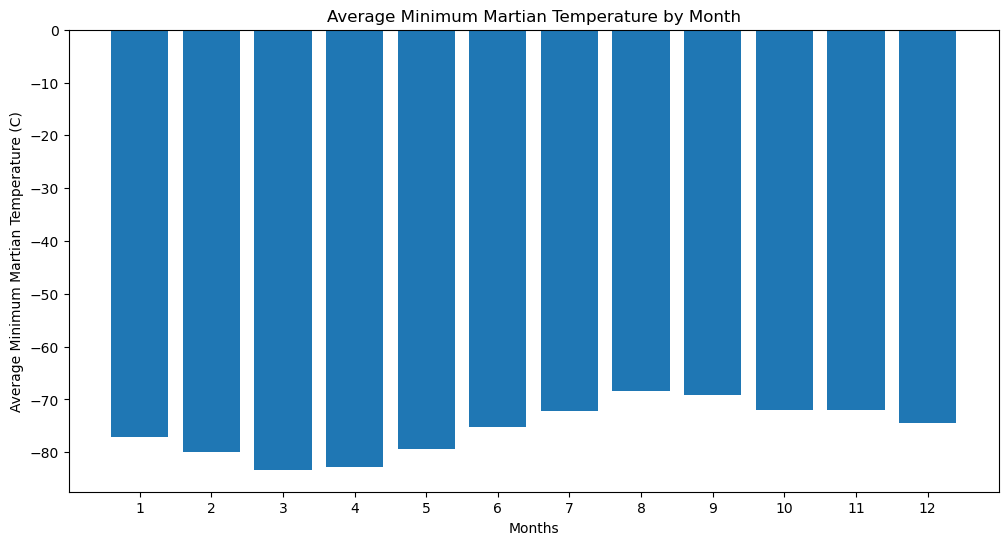

In [38]:
# Plot the average minimum temperature by month
plt.figure(figsize=(12, 6)) 
plt.bar(avg_month_min_temp['month'], avg_month_min_temp['min_temp'])
plt.xticks(range(1, 13))  
plt.xlabel('Months')
plt.ylabel('Average Minimum Martian Temperature (C)')
plt.title('Average Minimum Martian Temperature by Month')
plt.show()

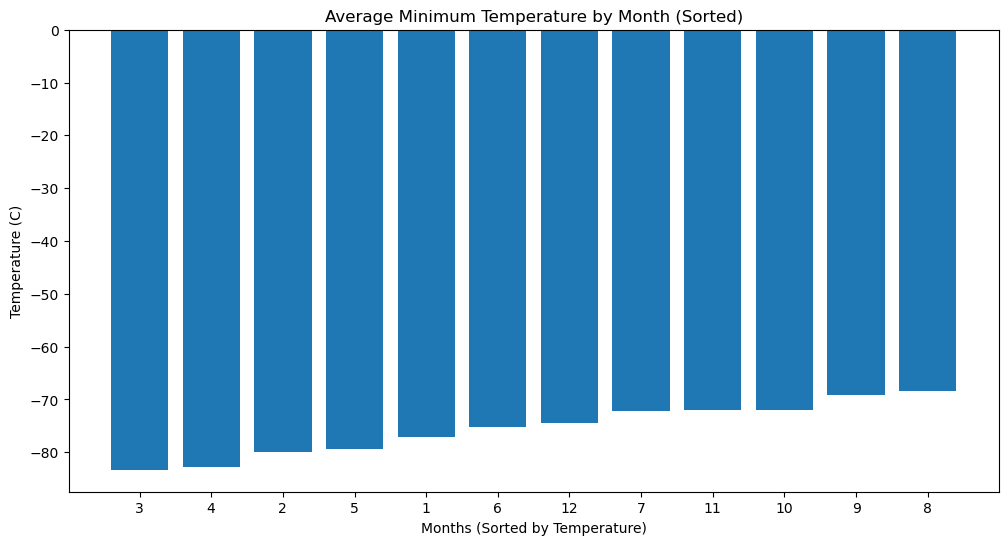

In [40]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sort_temp = avg_month_min_temp.sort_values(by='min_temp')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sort_temp)), sort_temp['min_temp'])

# x-axis update
plt.xticks(range(len(sort_temp)), sort_temp['month'], rotation=0)

# labels and title
plt.xlabel('Months (Sorted by Temperature)')
plt.ylabel('Temperature (C)')
plt.title('Average Minimum Temperature by Month (Sorted)')

plt.show()

In [42]:
# 4. What is the average pressure by month?
avg_monthly_pressure = df1.groupby('month')['pressure'].mean()
avg_monthly_pressure = avg_monthly_pressure.reset_index()
avg_monthly_pressure

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


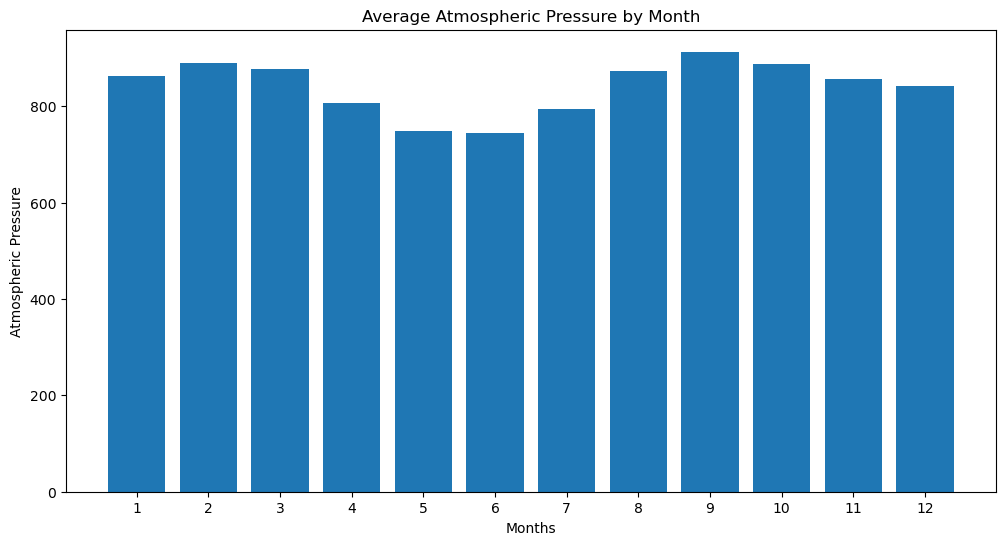

In [44]:
# Plot the average pressure by month
plt.figure(figsize=(12, 6))
plt.bar(avg_monthly_pressure['month'], avg_monthly_pressure['pressure'])

# Add labels and title
plt.xticks(range(1, 13))
plt.xlabel('Months')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month')

plt.show()

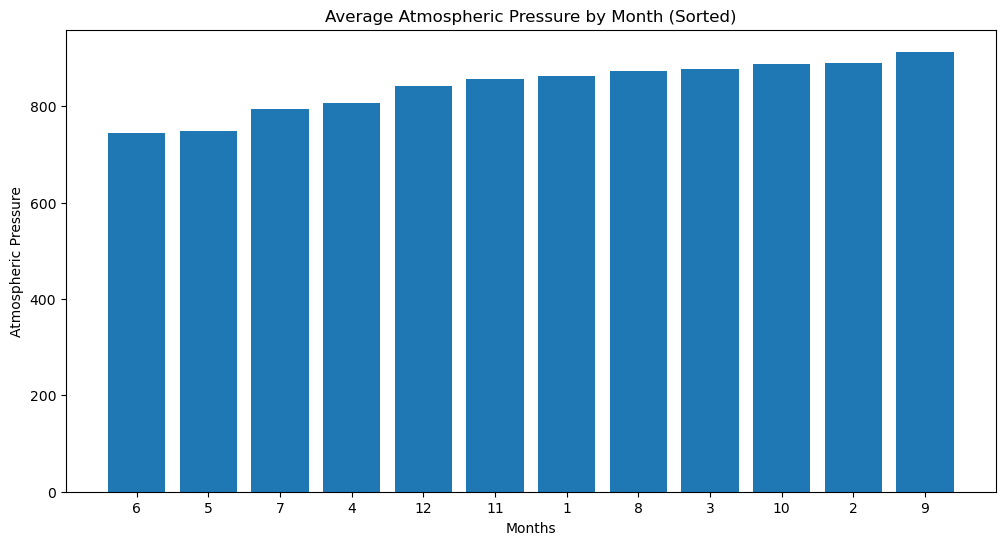

In [46]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sort_pressure = avg_monthly_pressure.sort_values(by='pressure')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(range(len(sort_pressure)), sort_pressure['pressure'])

# x-axis update
plt.xticks(range(len(sort_pressure)), sort_pressure['month'])

# labels and title
plt.xlabel('Months')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month (Sorted)')

plt.show()

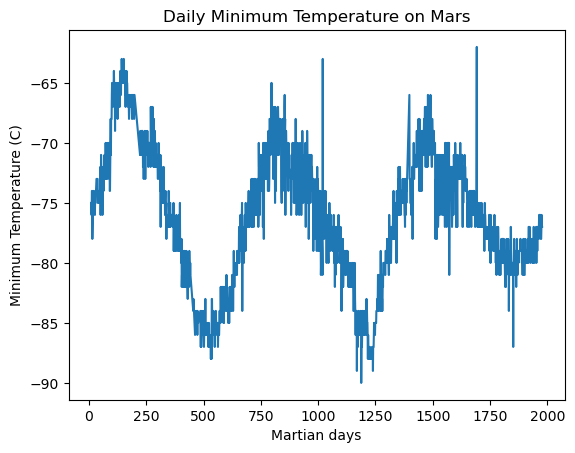

In [48]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df1['sol'], df1['min_temp'])
plt.xlabel('Martian days')
plt.ylabel('Minimum Temperature (C)')
plt.title('Daily Minimum Temperature on Mars')
plt.show()

#### Minimum Temperature

According to the observed data, the third month of the martian year has the lowest average minimum temperature. In contrast, the eighth month of the martian year has the highest average minimum temperature

#### Atmospheric Pressure

According to the observed data, the sixth month of the martian year has the lowest average atmospheric pressure. In contrast, the ninth month of the martian year has the highest average atmospheric pressure.

#### Year Length

Observation of the daily minimum temperatures shows a difference of approximately 680 days per cycle, which corresponds to estimated length of a Martian year. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [54]:
# Write the data to a CSV
df1.to_csv('mars_weather_analysis.csv',  encoding='utf8', index=False)

In [56]:
browser.quit()